In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df= pd.read_csv('data/covid19.csv')
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [5]:
df.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [6]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [7]:
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^a-z0-9_]+','_',regex=True)
)
df

,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,deaths_100_cases,recovered_100_cases,deaths_100_recovered,confirmed_last_week,1_week_change,1_week_increase,who_region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [8]:
df.columns

Index(['country_region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'deaths_100_cases',
       'recovered_100_cases', 'deaths_100_recovered', 'confirmed_last_week',
       '1_week_change', '1_week_increase', 'who_region'],
      dtype='object')

#### Scatter Plot

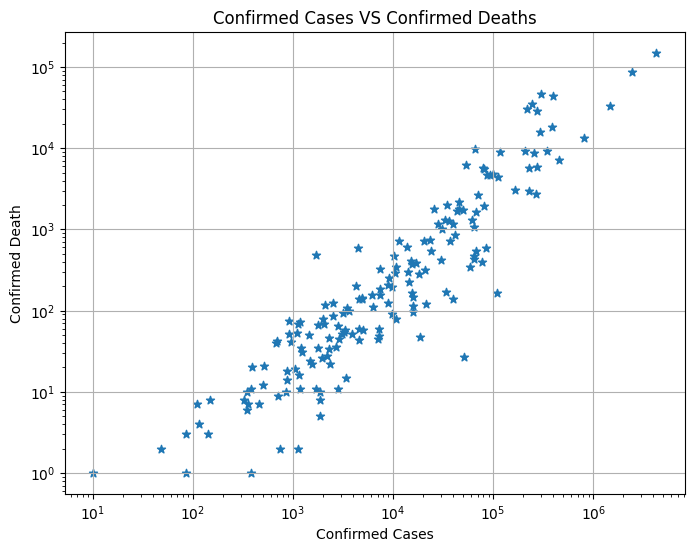

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df['confirmed'],df['deaths'], marker='*' )

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Confirmed Cases')
plt.ylabel('Confirmed Death')
plt.title('Confirmed Cases VS Confirmed Deaths')
plt.grid(True)

plt.show()

#### Bar Chart

In [10]:
grouped= df.groupby('who_region')['deaths'].sum()
grouped.sort_values(ascending=False)

who_region
Americas                 342732
Europe                   211144
South-East Asia           41349
Eastern Mediterranean     38339
Africa                    12223
Western Pacific            8249
Name: deaths, dtype: int64

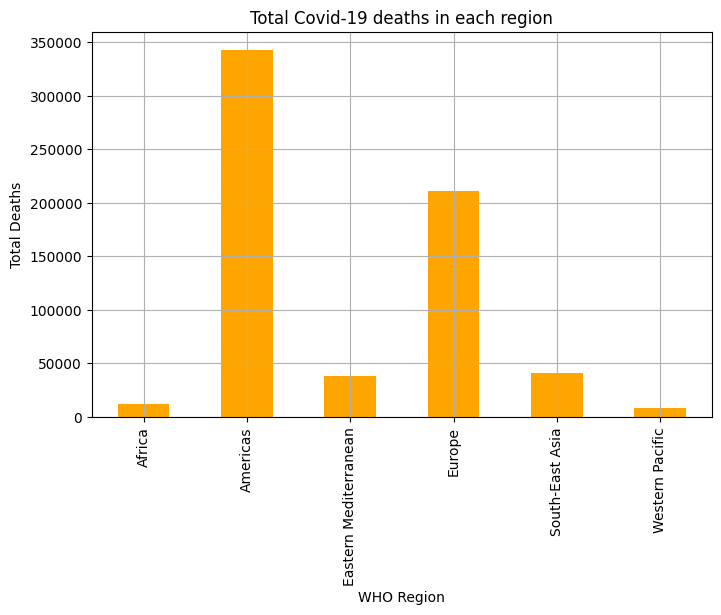

In [11]:
plt.figure(figsize=(8,5))
grouped.plot(kind='bar', color='orange')
plt.xlabel("WHO Region")
plt.ylabel("Total Deaths")
plt.title('Total Covid-19 deaths in each region')
plt.grid(True)
plt.show()

In [12]:
high_case=df.sort_values(by='confirmed', ascending=False).head(5)
high_case

,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,deaths_100_cases,recovered_100_cases,deaths_100_recovered,confirmed_last_week,1_week_change,1_week_increase,who_region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa


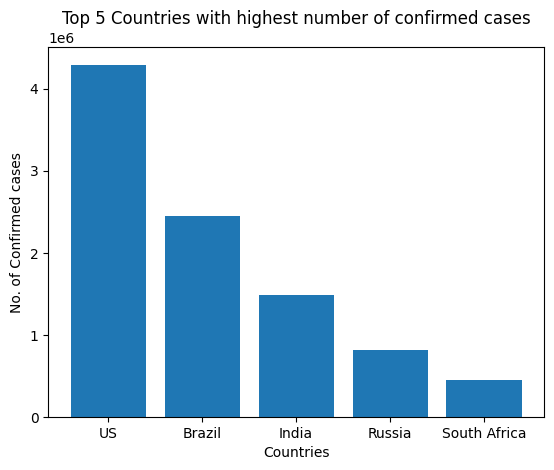

In [13]:
plt.figure()
plt.bar(high_case['country_region'], high_case['confirmed'])


plt.xlabel('Countries')
plt.ylabel('No. of Confirmed cases')
plt.title('Top 5 Countries with highest number of confirmed cases')

plt.show()

#### Line Plot

In [14]:
df.columns

Index(['country_region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'deaths_100_cases',
       'recovered_100_cases', 'deaths_100_recovered', 'confirmed_last_week',
       '1_week_change', '1_week_increase', 'who_region'],
      dtype='object')

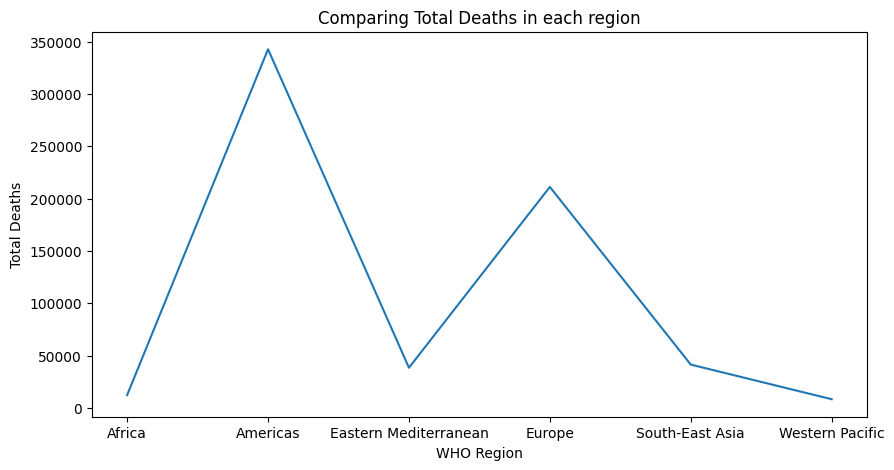

In [15]:
plt.figure(figsize=(10,5))
grouped.plot(kind='line')
plt.xlabel('WHO Region')
plt.ylabel('Total Deaths')
plt.title('Comparing Total Deaths in each region')
plt.show()

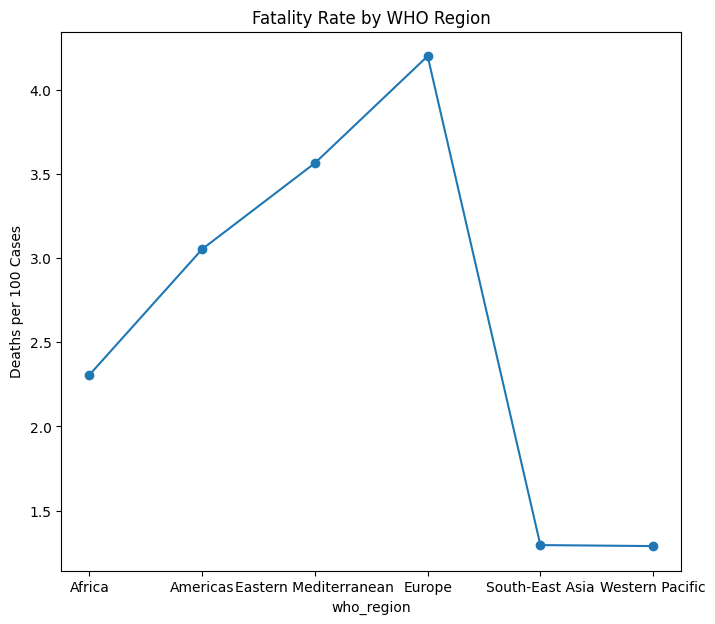

In [16]:
rates = df.groupby('who_region')['deaths_100_cases'].mean()

plt.figure(figsize=(8,7))
rates.plot(kind='line', marker='o')
plt.ylabel('Deaths per 100 Cases')
plt.title('Fatality Rate by WHO Region')
plt.show()

#### Histograms


In [17]:
df.columns

Index(['country_region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'deaths_100_cases',
       'recovered_100_cases', 'deaths_100_recovered', 'confirmed_last_week',
       '1_week_change', '1_week_increase', 'who_region'],
      dtype='object')

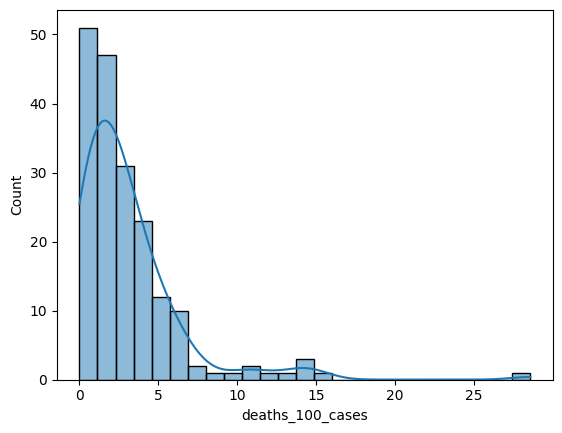

In [29]:
sns.histplot(df['deaths_100_cases'], bins=25, kde=True)
plt.show()

In [30]:
df['deaths_100_cases'].count()

np.int64(187)

In [31]:
df_corr = df.corr(numeric_only=True)

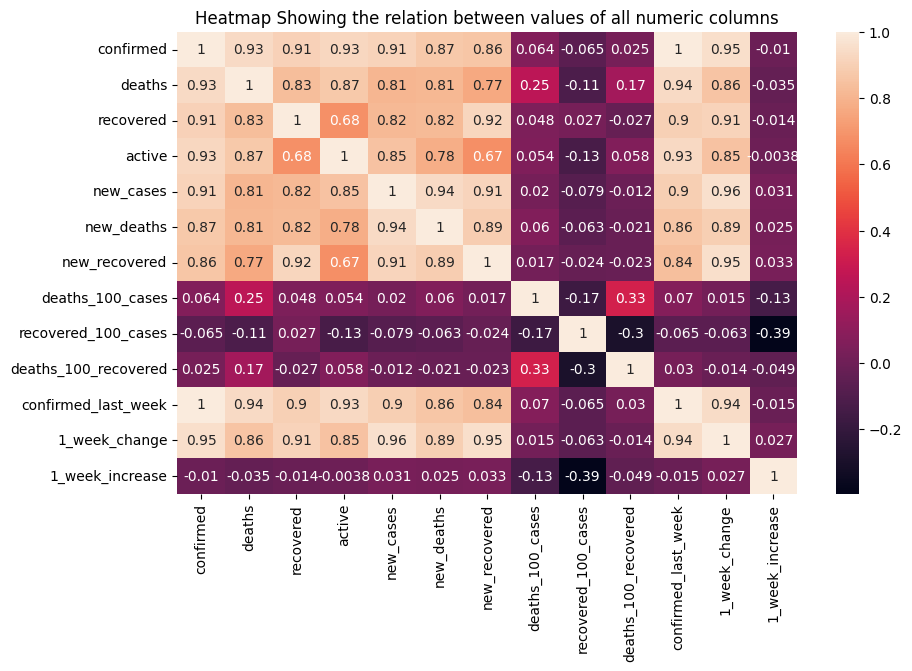

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True)
plt.title('Heatmap Showing the relation between values of all numeric columns')
plt.show()

#### Box Plot

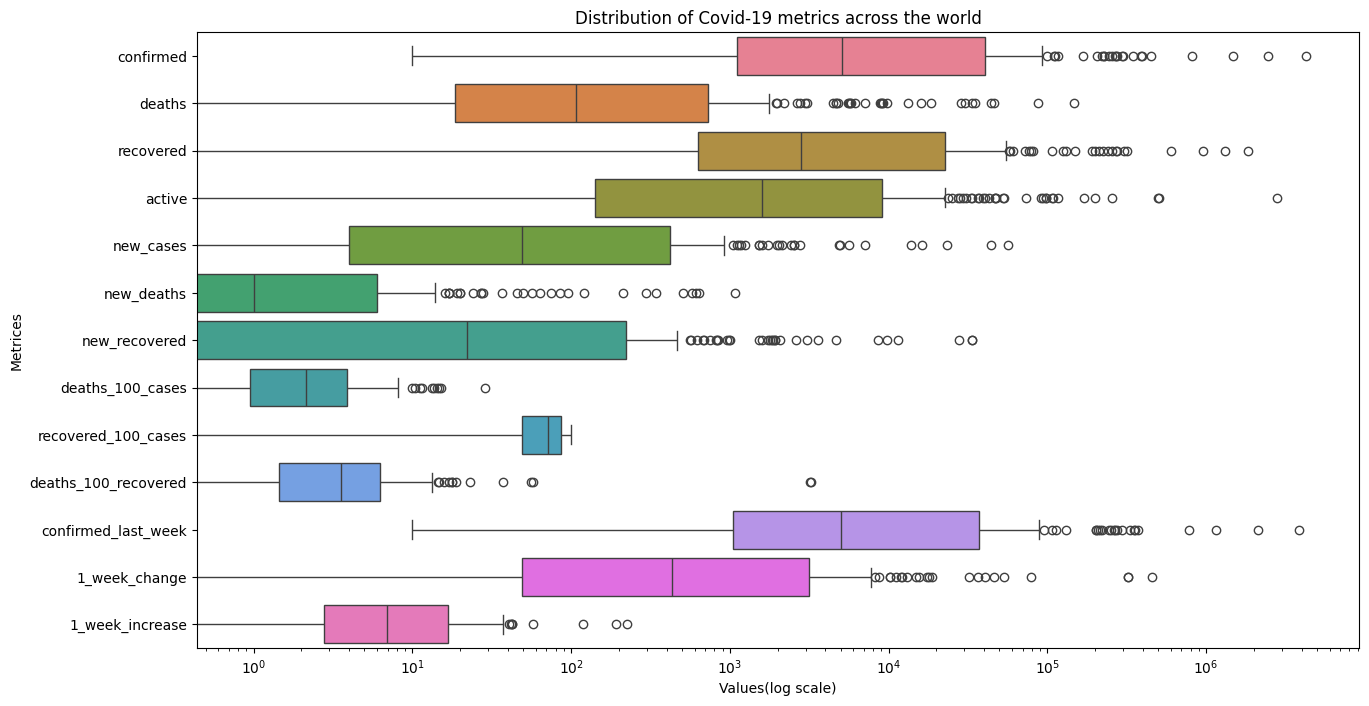

In [67]:
plt.figure(figsize=(15,8))
sns.boxplot(df, orient='h')
plt.xscale('log')
plt.title('Distribution of Covid-19 metrics across the world')
plt.xlabel('Values(log scale)')
plt.ylabel('Metrices')
plt.show()